In [2]:
import torch, random
from statistics import mean
from cebmf_torch import cEBMF
import matplotlib.pyplot as plt
# ---- config
NUM_RUNS   =7
N, P       = 50, 40
NOISE_STD  = 1.0
MAXIT      = 50
TOL        = 1e-9   # numerical tolerance for strictness

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_dtype(torch.float64)

def is_strictly_increasing(xs, tol=0.0001):
    # xs[t+1] > xs[t] + tol  for all t
    return all(xs[t+1] > xs[t] + tol for t in range(len(xs)-1))

def is_strictly_decreasing(xs, tol=0.0):
    # xs[t+1] < xs[t] - tol  for all t
    return all(xs[t+1] < xs[t] - tol for t in range(len(xs)-1))

def one_run(seed):
    # reproducibility
    random.seed(seed)
    torch.manual_seed(seed)

    # rank-1 signal + Gaussian noise
    u = torch.rand(N, device=device)
    v = torch.rand(P, device=device)
    Y = torch.outer(u, v) + NOISE_STD * torch.randn(N, P, device=device)

    model = cEBMF(data=Y, K=5)
    model.initialise_factors()
    model.fit(maxit=MAXIT)

    loss_hist = model.obj                       # your stored objective = negative ELBO
    return(loss_hist)
 


results=[]

for i in range(NUM_RUNS):
    results.append( one_run(i))
 

Converged after 57 iterations.
Converged after 71 iterations.
Converged after 55 iterations.
Converged after 56 iterations.
Converged after 67 iterations.
Converged after 55 iterations.
Converged after 57 iterations.
Converged after 56 iterations.
Converged after 56 iterations.
Converged after 59 iterations.
Converged after 66 iterations.
Converged after 55 iterations.
Converged after 65 iterations.
Converged after 55 iterations.
Converged after 65 iterations.
Converged after 55 iterations.
Converged after 65 iterations.
Converged after 55 iterations.
Converged after 65 iterations.
Converged after 55 iterations.
Converged after 65 iterations.
Converged after 55 iterations.
Converged after 65 iterations.
Converged after 55 iterations.
Converged after 65 iterations.
Converged after 55 iterations.
Converged after 68 iterations.
Converged after 55 iterations.
Converged after 68 iterations.
Converged after 55 iterations.
Converged after 67 iterations.
Converged after 55 iterations.
Converge

In [ ]:
results[0]

[2800.3500440455905,
 2805.453223515565,
 2808.280502831113,
 2810.2003530905245,
 2811.6932202420285,
 2812.945166428215,
 2814.045974318565,
 2815.0446505572236,
 2815.970938579571,
 2816.8447788626104,
 2817.6803086357368,
 2818.488721829083,
 2819.2792910766743,
 2820.0604753586517,
 2820.8399410059133,
 2821.6253568573206,
 2822.42477253352,
 2823.246628833359,
 2824.100075657707,
 2824.996102728929,
 2825.9473048842106,
 2826.9686042243375,
 2828.0783012417546,
 2829.2990600331045,
 2830.657655794277,
 2832.185627099681,
 2833.9174884282647,
 2835.8828504582902,
 2838.0927354503447,
 2840.5151229845346,
 2843.058552288285,
 2845.5906135416512,
 2847.9896965138105,
 2850.179283576466,
 2852.1188739356944,
 2853.7820096114965,
 2855.1535927148884,
 2856.228326218593,
 2857.038816604717,
 2857.629892015236,
 2858.048205857204,
 2858.337572081097,
 2858.5344902905813,
 2858.666884329614,
 2858.7553908790637,
 2858.8137274660867,
 2858.852504830073]

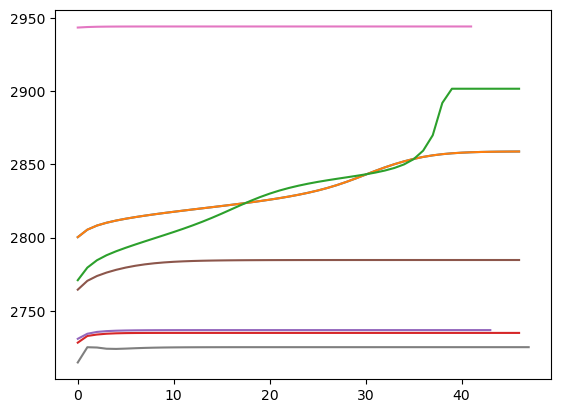

In [ ]:
plt.plot(results[0])
for i in range(NUM_RUNS):
    plt.plot(results[i])

In [ ]:
def is_strictly_increasing(xs, tol=0.1):
    # xs[t+1] > xs[t] + tol  for all t
    return all(xs[t+1] > xs[t] - tol for t in range(len(xs)-1))

In [ ]:
is_strictly_increasing(results[0])

True

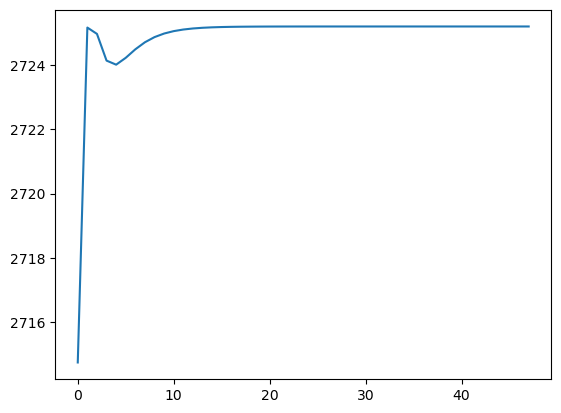

In [ ]:
plt.plot(results[6])

In [ ]:
h=0

for i in range(NUM_RUNS):
    if (is_strictly_increasing(results[i], tol=0.5))== False:
        h=h+1
print(h)

1
